Original Sequences: 67744790, Filtered: 0, Kept: 67744790


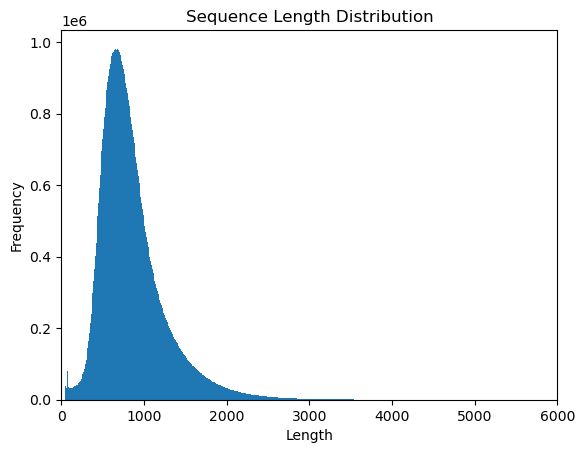

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

def filter_fastq(file_path, length_threshold):
    lengths = []
    total_seqs, filtered_seqs, kept_seqs = 0, 0, 0
    with open(file_path, 'r') as infile:
        while True:
            identifier = infile.readline()
            if not identifier:
                break
            sequence = infile.readline()
            plus_line = infile.readline()
            quality_score = infile.readline()
            total_seqs += 1
            if len(sequence.strip()) >= length_threshold :
                lengths.append(len(sequence.strip()))
                kept_seqs += 1
            else:
                filtered_seqs += 1
    return lengths, total_seqs, filtered_seqs, kept_seqs

def process_path(path, length_threshold):
    all_lengths = []
    total_seqs, total_filtered, total_kept = 0, 0, 0
    if os.path.isfile(path):
        lengths, seqs, filtered, kept = filter_fastq(path, length_threshold)
        all_lengths.extend(lengths)
        total_seqs += seqs
        total_filtered += filtered
        total_kept += kept
    elif os.path.isdir(path):
        for filename in os.listdir(path):
            if filename.endswith('.fastq'):
                file_path = os.path.join(path, filename)
                lengths, seqs, filtered, kept = filter_fastq(file_path, length_threshold)
                all_lengths.extend(lengths)
                total_seqs += seqs
                total_filtered += filtered
                total_kept += kept
    print(f"Original Sequences: {total_seqs}, Filtered: {total_filtered}, Kept: {total_kept}")
    return all_lengths

def plot_length_distribution(lengths):
    """绘制长度分布图"""

    hist, bins = np.histogram(lengths, bins=np.arange(0, 6010, 10))
    plt.bar(bins[:-1], hist, width=10)
    plt.title("Sequence Length Distribution")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.xlim(0, 6000)
    plt.show()

def main():
    path = "/dm_data/zhaixp/20241217-dyn-soil/bbmap_input.fastq"
    length_threshold = 0  # 设置长度阈值
    lengths = process_path(path, length_threshold)
    plot_length_distribution(lengths)
if __name__ == "__main__":
    main()


Original Sequences: 88530488, Filtered: 3191, Kept: 88527297


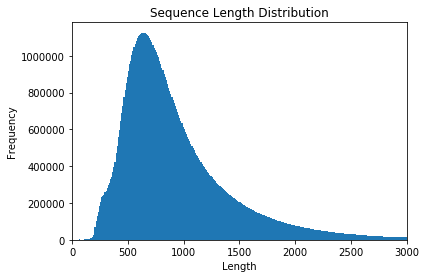

In [2]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def filter_fastq(file_path, length_threshold):
    """过滤FASTQ文件，删除长度小于阈值的序列，并返回序列长度列表和统计信息"""
    lengths = []
    total_seqs, filtered_seqs, kept_seqs = 0, 0, 0
    output_path = file_path.replace('.fastq', '_filtered.fastq')
    with open(file_path, 'r') as infile, open(output_path, 'w') as outfile:
        while True:
            identifier = infile.readline()
            if not identifier:
                break
            sequence = infile.readline()
            plus_line = infile.readline()
            quality_score = infile.readline()
            total_seqs += 1
            if len(sequence.strip()) >= length_threshold and len(sequence.strip())<= 30000:
                outfile.write(identifier + sequence + plus_line + quality_score)
                lengths.append(len(sequence.strip()))
                kept_seqs += 1
            else:
                lengths.append(len(sequence.strip()))
                filtered_seqs += 1
    return lengths, total_seqs, filtered_seqs, kept_seqs

def process_path(path, length_threshold):
    """处理单个文件或文件夹中的所有FASTQ文件，应用长度阈值"""
    all_lengths = []
    total_seqs, total_filtered, total_kept = 0, 0, 0
    if os.path.isfile(path):
        lengths, seqs, filtered, kept = filter_fastq(path, length_threshold)
        all_lengths.extend(lengths)
        total_seqs += seqs
        total_filtered += filtered
        total_kept += kept
    elif os.path.isdir(path):
        for filename in os.listdir(path):
            if filename.endswith('.fastq'):
                file_path = os.path.join(path, filename)
                lengths, seqs, filtered, kept = filter_fastq(file_path, length_threshold)
                all_lengths.extend(lengths)
                total_seqs += seqs
                total_filtered += filtered
                total_kept += kept
    print(f"Original Sequences: {total_seqs}, Filtered: {total_filtered}, Kept: {total_kept}")
    return all_lengths

def plot_length_distribution(lengths):
    """绘制长度分布图"""
    plt.hist(lengths, bins=np.arange(0, 3010, 10))
    plt.title("Sequence Length Distribution")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.xlim(0, 3000)
    plt.show()

def main():
    path = "/home/lisy01/zhaixuanpei/20240813/pool5.fastq"
    length_threshold = 20  # 设置长度阈值
    lengths = process_path(path, length_threshold)
    plot_length_distribution(lengths)

    # 新增代码：计算长度计数并写入文件
    #length_counts = Counter(lengths)
    #with open("/home/lisy01/zhaixuanpei/20240813/barcode01/length_counts.txt", "w") as outfile:
    #    for length, count in sorted(length_counts.items()):
    #        outfile.write(f"{length} {count}\n")

if __name__ == "__main__":
    main()


In [2]:
import os
from Bio import SeqIO

def calculate_n50(lengths):
    lengths.sort(reverse=True)
    cumulative_sum = 0
    total_length = sum(lengths)
    for length in lengths:
        cumulative_sum += length
        if cumulative_sum >= total_length / 2:
            return length

def process_fasta_file(file_path):
    lengths = [len(record.seq) for record in SeqIO.parse(file_path, "fasta")]
    contig_count = len(lengths)
    average_length = sum(lengths) / contig_count if contig_count else 0
    n50 = calculate_n50(lengths) if contig_count else 0
    return contig_count, average_length, n50

def main(input_dir, output_file):
    with open(output_file, 'w') as out_f:
        out_f.write("Filename\tContig_Count\tAverage_Length\tN50\n")
        for filename in os.listdir(input_dir):
            if filename.endswith(".fasta") or filename.endswith(".fa"):
                file_path = os.path.join(input_dir, filename)
                contig_count, avg_length, n50 = process_fasta_file(file_path)
                out_f.write(f"{filename}\t{contig_count}\t{avg_length:.2f}\t{n50}\n")

if __name__ == "__main__":
    input_directory = "/home/lisy01/liuyifan/assembly/humanmeta/five_bac1/racon3_fasta"  # Replace with your directory path
    output_filename = "//home/lisy01/zhaixuanpei/20240813/barcode01-pool5/coverage_length.txt"
    main(input_directory, output_filename)
